# 개별 코드

In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from tensorflow.keras.datasets import imdb

(X_tn0,y_tn0),(X_te0,y_test)=imdb.load_data(num_words=2000)

In [3]:
# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
# 트레이닝/밸리데이션셋 분리
X_train = X_tn0[0:20000]
y_train = y_tn0[0:20000]
X_valid = X_tn0[20000:25000]
y_valid = y_tn0[20000:25000]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20000,)
(20000,)
(5000,)
(5000,)


In [6]:
# 피쳐 데이터 형태 확인
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 개별 피쳐 크기 확인
print(len(X_train[0]))
print(len(X_train[1]))

218
189


In [8]:
# 타겟 클래스 확인
print(set(y_test))
print(len(set(y_test)))

{0, 1}
2


In [9]:
# 피쳐 데이터 변형
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
X_test = sequence.pad_sequences(X_te0, maxlen=100)

In [10]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(20000, 100)
(5000, 100)
(25000, 100)


In [11]:
# LSTM 모형 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3, 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, None, 50)          15050     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 50)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                        

In [12]:
# 모형 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# 학습
hist = model.fit(X_train, y_train, 
                 batch_size=100, 
                 epochs=10, 
                 validation_data=(X_valid, y_valid))

Epoch 1/10
200/200 [==============================] - 9s 42ms/step - loss: 0.4786 - accuracy: 0.7562 - val_loss: 0.3884 - val_accuracy: 0.8278
Epoch 2/10
200/200 [==============================] - 8s 39ms/step - loss: 0.3425 - accuracy: 0.8542 - val_loss: 0.3736 - val_accuracy: 0.8294
Epoch 3/10
200/200 [==============================] - 8s 39ms/step - loss: 0.3020 - accuracy: 0.8753 - val_loss: 0.3716 - val_accuracy: 0.8316
Epoch 4/10
200/200 [==============================] - 8s 41ms/step - loss: 0.2624 - accuracy: 0.8939 - val_loss: 0.3871 - val_accuracy: 0.8318
Epoch 5/10
200/200 [==============================] - 8s 39ms/step - loss: 0.2091 - accuracy: 0.9229 - val_loss: 0.4375 - val_accuracy: 0.8208
Epoch 6/10
200/200 [==============================] - 8s 39ms/step - loss: 0.1503 - accuracy: 0.9454 - val_loss: 0.4187 - val_accuracy: 0.8252
Epoch 7/10
200/200 [==============================] - 8s 39ms/step - loss: 0.0896 - accuracy: 0.9718 - val_loss: 0.5931 - val_accuracy: 0.8146

In [14]:
# 트레이닝 데이터 평가
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])

625/625 [==============================] - 4s 6ms/step - loss: 0.0118 - accuracy: 0.9980
0.9980499744415283
157/157 [==============================] - 1s 6ms/step - loss: 0.7643 - accuracy: 0.8184
0.8184000253677368


In [15]:
# 테스트 데이터 평가
print(model.evaluate(X_test, y_test)[1])

782/782 [==============================] - 5s 6ms/step - loss: 0.7332 - accuracy: 0.8232
0.8232399821281433


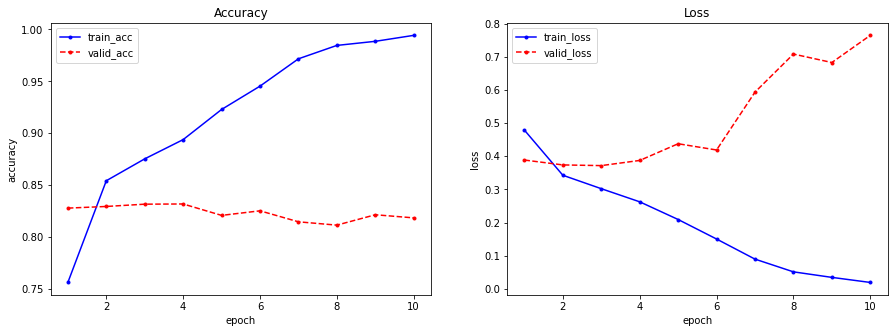

In [16]:
# 정확도 학습 그래프
import numpy as np

epoch = np.arange(1,11)
acc_train = hist.history['accuracy'] 
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss'] 
loss_valid = hist.history['val_loss']

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)

plt.plot(epoch, acc_train,'b',
         marker='.',
         label='train_acc')
plt.plot(epoch, acc_valid,'r--',
         marker='.',
         label='valid_acc')

plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(122)

plt.plot(epoch,loss_train,'b',
         marker='.',
         label='train_loss')
plt.plot(epoch,loss_valid,'r--',
         marker='.',
         label='valid_loss')

plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

# 통합 코드

(25000,)
(25000,)
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
189
{0, 1}
2
Model: "sequential_1"
______________________________

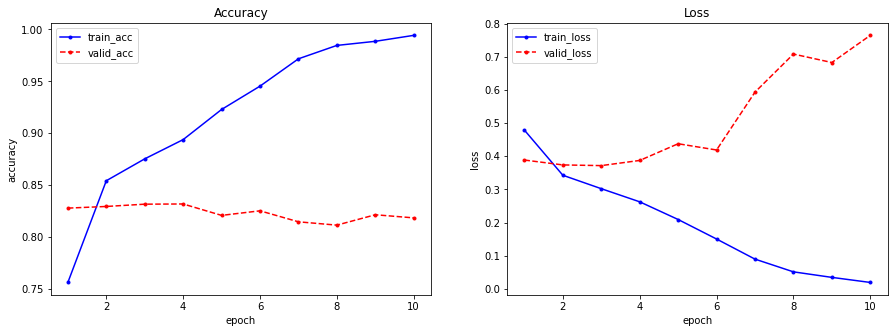

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
(X_tn0,y_tn0),(X_te0,y_test)=imdb.load_data(num_words=2000)

# 원본 데이터 차원 확인
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_test.shape)

# 트레이닝/밸리데이션셋 분리
X_train = X_tn0[0:20000]
y_train = y_tn0[0:20000]
X_valid = X_tn0[20000:25000]
y_valid = y_tn0[20000:25000]

# 피쳐 데이터 형태 확인
print(X_train[0])

# 개별 피쳐 크기 확인
print(len(X_train[0]))
print(len(X_train[1]))

# 타겟 클래스 확인
print(set(y_test))
print(len(set(y_test)))

# 피쳐 데이터 변형
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_valid = sequence.pad_sequences(X_valid, maxlen=100)
X_test = sequence.pad_sequences(X_te0, maxlen=100)

# LSTM 모형 생성
model = Sequential()
model.add(Embedding(input_dim=2000, output_dim=100))
model.add(Conv1D(50, kernel_size=3, 
                 padding='valid', 
                 activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모형 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 학습
hist = model.fit(X_train, y_train, 
                 batch_size=100, 
                 epochs=10, 
                 validation_data=(X_valid, y_valid))

# 트레이닝 데이터 평가
print(model.evaluate(X_train, y_train)[1])
print(model.evaluate(X_valid, y_valid)[1])

# 테스트 데이터 평가
print(model.evaluate(X_test, y_test)[1])

# 정확도 학습 그래프
epoch = np.arange(1,11)
acc_train = hist.history['accuracy'] 
acc_valid = hist.history['val_accuracy']
loss_train = hist.history['loss'] 
loss_valid = hist.history['val_loss']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(epoch, acc_train,'b',
         marker='.',
         label='train_acc')
plt.plot(epoch, acc_valid,'r--',
         marker='.',
         label='valid_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epoch,loss_train,'b',
         marker='.',
         label='train_loss')
plt.plot(epoch,loss_valid,'r--',
         marker='.',
         label='valid_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()